In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Model adopted from Glover 2002's paper titled `Hydrodynamics of particle formation following femtosecond laser ablation`. The basics of the model can be summaried by:

$$\rho = \rho_0 \left[ 1 - 0.5 (\gamma - 1) \left( \frac{|v|}{c_0} \right) \right]^{\frac{2}{\gamma - 1}}$$
$$P = P_0 \left[ 1 - 0.5 (\gamma - 1) \left( \frac{|v|}{c_0} \right)^2 \right]^{\frac{\gamma}{\gamma - 1}}$$
$$ T = T_0 \left[ 1 - 0.5 (\gamma - 1) \left( \frac{|v|}{c_0} \right)^2 \right]$$

where $\rho$, $P$, $T$ are the density, pressure, and temperature of the matter, $c_0$ is the sound velocity, $\gamma = C_p/C_v$ is the ratio of specific heat at constant pressure to that at constant volume, and $|v|$ is the speed of the fluid element given by:

$$|v| = \frac{2}{\gamma + 1}\left(c_0 - \frac{x}{t}\right).$$

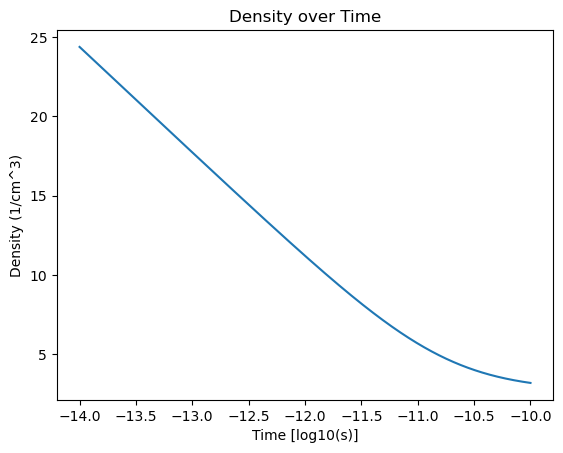

In [254]:
# Defining inital values
x = 1 * 1e-6 # guessed value to be simular scale to time
t = np.logspace(-14, -10, 10000, base=10)
gamma = 1.3 # another guess
c_0 = 8433 # speed of sound Si
rho0 = 1330 # Density of Si


# velocity =  (2 / (gamma + 1)) * (c_0 - (x/t))
rho = rho0 * ( 1 - 0.5 * (gamma - 1) * ((2 / (gamma + 1)) * (c_0 - x / t)) / c_0) ** (2 / (gamma - 1))

# plt.axhline(y=velocity_limit, color='gray', linestyle='--', linewidth=1, alpha=1)
plt.plot(np.log10(t), np.log10(rho))

plt.title("Density over Time")
plt.xlabel('Time [log10(s)]')
plt.ylabel('Density (1/cm^3)')
plt.show()

![Screenshot 2024-08-22 at 5.57.33 PM.png](<attachment:Screenshot 2024-08-22 at 5.57.33 PM.png>)
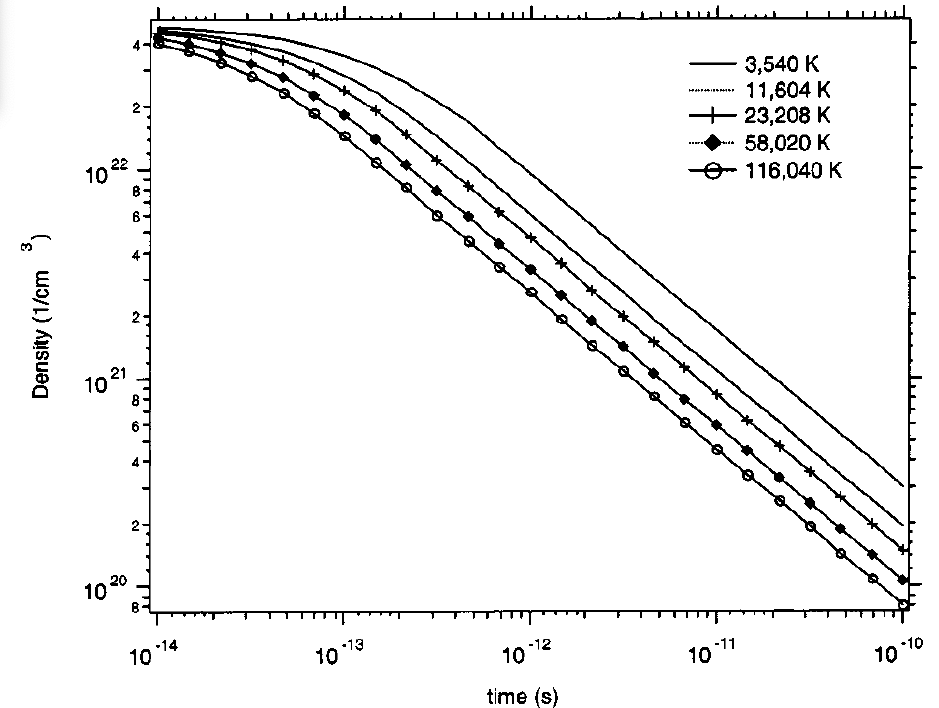

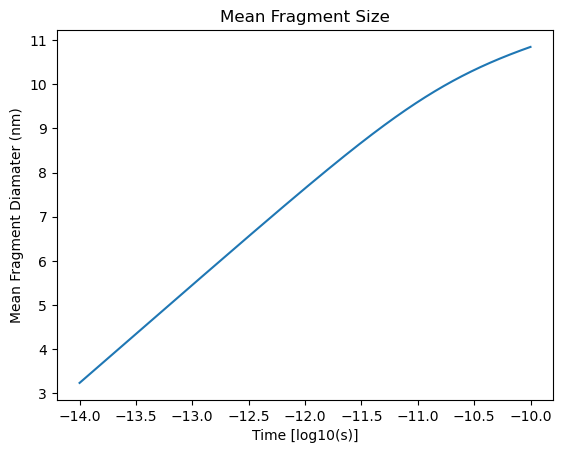

In [262]:
d_rho = np.diff(rho)

# surface energy
S = (3 * (d_rho ** 2) / (5 * rho[:-1] * gamma)) ** (1/3)

# Mean size distribution
d = 6/S

plt.plot(np.log10(t[:-1]), np.log10(d *1e9))

plt.title("Mean Fragment Size")
plt.xlabel('Time [log10(s)]')
plt.ylabel('Mean Fragment Diamater (nm)')
plt.show()

---
### Modeling based on questions for Landua and Lifschitz "Fluid Mechanics" 2000, `Chapter X`


**Problem 3.** A gas occupies a semi-infinite cylindrical pipe ($x > 0$) terminated by a valve. At time $t = 0$, the valve is opened, and the gas flows into the external medium, the pressure $p_e$, which is less than the initial pressure $p_0$ in the pipe. Determine the resulting flow.

**SOLUTION.** Let $-v_e$ be the gas velocity which corresponds to the external pressure $p_e$, according to formula (99.16); 

$$p = p_0[1 - 0.5(\gamma - 1)|v|/c_0]^{2\gamma/(\gamma - 1)}$$

for \(x = 0\) and \(t > 0\), we must have \(v = -v_e\). If \(v_e < 2c_0/(γ + 1)\), the velocity distribution shown in Fig. 77a results. For \(v_e = 2c_0/(γ + 1)\) (corresponding to a rate of outflow equal to the local velocity of sound at the end of the pipe; this is easily seen by putting \(v = c\) in formula (99.14)), the region of constant velocity vanishes and the pattern shown in Fig. 77b is obtained. The quantity \(2c_0/(γ + 1)\) is the greatest possible rate of outflow from the pipe in the conditions stated. If the external pressure \(p_e\) is such that

$$ p_e < p_0 \left[2/(γ + 1)\right]^{2γ/(γ-1)} $$

the corresponding velocity \(v_e\) exceeds \(2c_0/(γ + 1)\). In reality, the pressure at the pipe outlet would still be equal to the limiting value (the right-hand side of (1)), and the rate of outflow would be \(2c_0/(γ + 1)\); the remaining pressure drop (to \(p_e\)) occurs in the external medium.


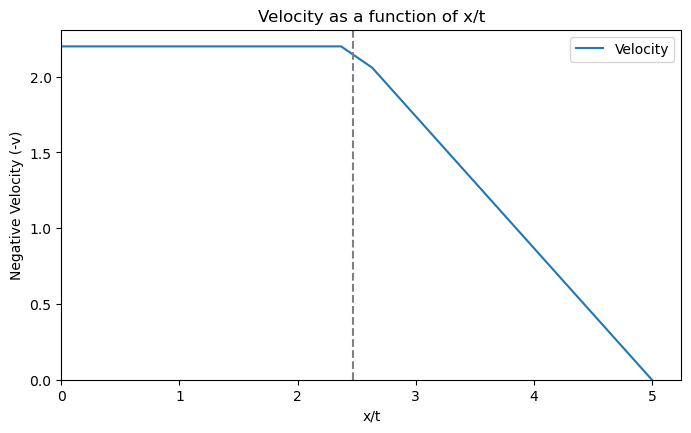

In [4]:
# Parameters
v0 = 2.2  # Example value for v_0
gamma = 1.3 # Example value for γ
c_0 = 5  # Example speed of sound at the pipe end

# Create x values
x = np.linspace(0, c_0, 20)

# Calcuating the velocity profile of the fluid.
v_a = np.piecewise(x, [x < c_0-0.5*(gamma+1)*v0, 
                       x > c_0-0.5*(gamma+1)*v0],
                  [lambda x: v0, 
                   lambda x: (2/(gamma+1))*(c_0-x)])

# Plotting
plt.figure(figsize=(8, 10))

# Plot (a)
plt.subplot(2, 1, 1)
plt.plot(x, v_a, label='Velocity')
plt.title('Velocity as a function of x/t')
plt.xlabel('x/t')
plt.ylabel('Negative Velocity (-v)')
plt.legend()
plt.ylim(0)
plt.xlim(0)
plt.axvline(x=c0-0.5*(gamma+1)*v0, color='gray', linestyle='--')

Text(0.5, 1.0, 'Density over Time')

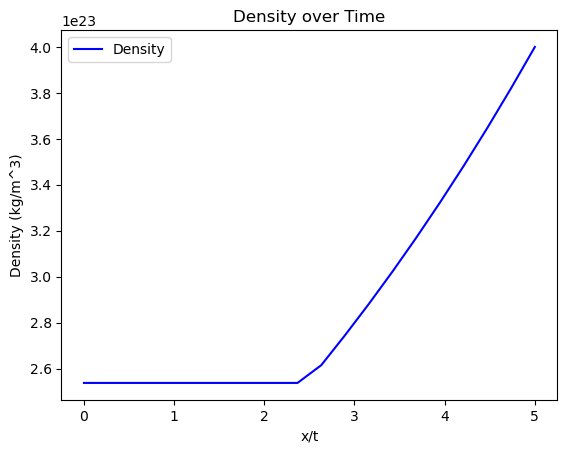

In [5]:
rho_0 = 4 * 10e22 # density (kg/m^3)
rho = rho_0 * (1 - 0.5 * (gamma - 1) * np.abs(v_a) / c_0) ** (2 / (gamma - 1))

plt.figure()
plt.plot(x, rho, color='blue', label='Density')
plt.xlabel('x/t')
plt.ylabel('Density (kg/m^3)')
plt.legend()
plt.title('Density over Time')

P_0 = 10e5        # pressure (Pa)
P = P_0 * (1 - 0.5 * (gamma - 1) * np.abs(u) / c_0)**(2 * gamma / (gamma - 1))

plt.figure()
plt.plot(np.log10(time), P, color='red', label='Pressure')
plt.xlabel('x/t')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.title('Pressure over log_10 Time')
plt.show()

In [7]:
# Initial parameters
T_0 = 11604       # temperature (K)
P_0 = 10e5        # pressure (Pa)
rho_0 = 4 * 10e22 # density (kg/m^3)

/var/folders/02/xft__gls33v4296f3wvtwkfr0000gn/T/ipykernel_8442/4111227020.py:23: RuntimeWarning: invalid value encountered in scalar power
  rho = rho_0 * (1 - 0.5 * (gamma - 1) * np.abs(u) / c_0)**(2 / (gamma - 1))
/var/folders/02/xft__gls33v4296f3wvtwkfr0000gn/T/ipykernel_8442/4111227020.py:24: RuntimeWarning: invalid value encountered in scalar power
  P = P_0 * (1 - 0.5 * (gamma - 1) * np.abs(u) / c_0)**(2 * gamma / (gamma - 1))
/var/folders/02/xft__gls33v4296f3wvtwkfr0000gn/T/ipykernel_8442/4111227020.py:25: RuntimeWarning: overflow encountered in scalar power
  T = T_0 * (1 - 0.5 * (gamma - 1) * np.abs(u) / c_0)**2
/var/folders/02/xft__gls33v4296f3wvtwkfr0000gn/T/ipykernel_8442/4111227020.py:20: RuntimeWarning: overflow encountered in scalar divide
  u = (2 / (gamma + 1)) * (c_0 - x / t)
/var/folders/02/xft__gls33v4296f3wvtwkfr0000gn/T/ipykernel_8442/4111227020.py:37: RuntimeWarning: invalid value encountered in scalar add
  x += u * dt


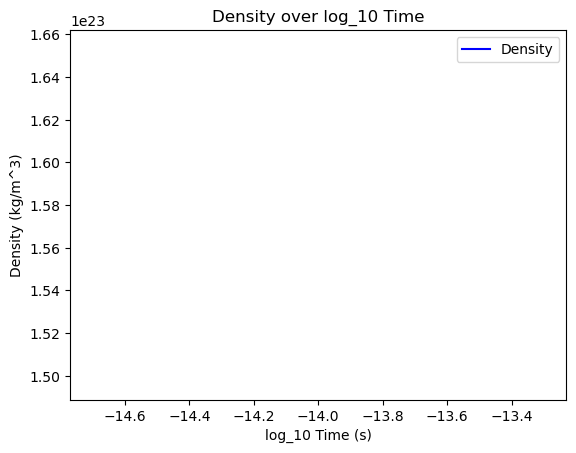

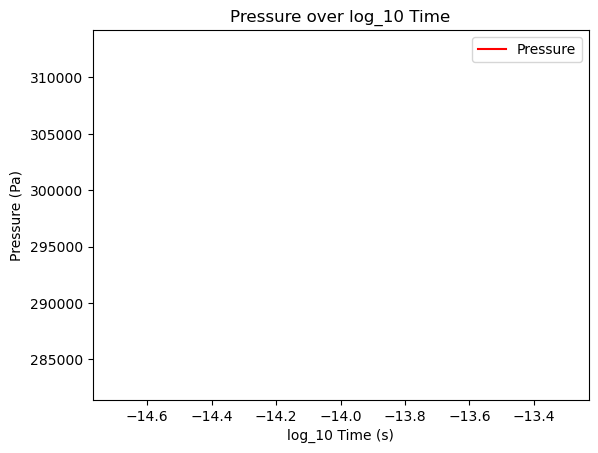

In [8]:
# Simulation parameters
time = np.logspace(-14, -10, 1000)

# Lists to store the results
rho_list = []
P_list = []
T_list = []
c_list = []
pos_list = []

# Initial position (x) and velocity (u)
x = 0

# Simulation loop
for t in time:
    if t == 0:
        continue  # avoid division by zero
    
    # Calculate velocity
    u = (2 / (gamma + 1)) * (c_0 - x / t)
    
    # Calculate the thermodynamic variables
    rho = rho_0 * (1 - 0.5 * (gamma - 1) * np.abs(u) / c_0)**(2 / (gamma - 1))
    P = P_0 * (1 - 0.5 * (gamma - 1) * np.abs(u) / c_0)**(2 * gamma / (gamma - 1))
    T = T_0 * (1 - 0.5 * (gamma - 1) * np.abs(u) / c_0)**2
    c = c_0 - 0.5 * (gamma - 1) * np.abs(u)
    
    # Store the results
    rho_list.append(rho)
    P_list.append(P)
    T_list.append(T)
    c_list.append(c)
    pos_list.append(x)
    
    # Update position
    dt = np.diff(np.log10(time))[0]
    x += u * dt

# Convert lists to numpy arrays
rho = np.array(rho_list)
P = np.array(P_list)
T = np.array(T_list)
c = np.array(c_list)
pos = np.array(pos_list)

# Plotting the results
plt.figure()
plt.plot(np.log10(time), rho, color='blue', label='Density')
plt.xlabel('log_10 Time (s)')
plt.ylabel('Density (kg/m^3)')
plt.legend()
plt.title('Density over log_10 Time')
plt.show()

plt.figure()
plt.plot(np.log10(time), P, color='red', label='Pressure')
plt.xlabel('log_10 Time (s)')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.title('Pressure over log_10 Time')
plt.show()



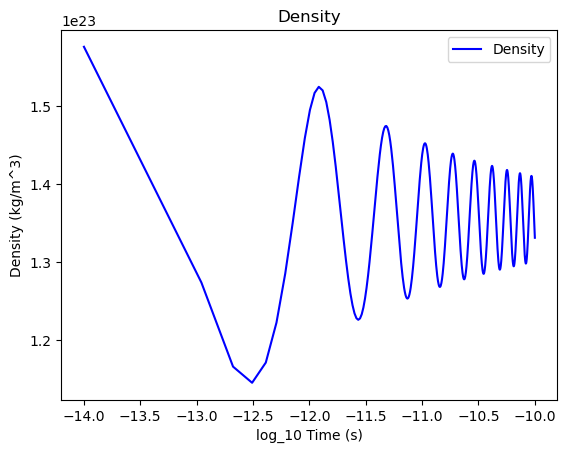

In [9]:
# Simulation parameters
time = np.linspace(1e-14, 1e-10, 1000)


# Lists to store the results
rho_list = []
pos_list = []

# Initial velocity
u = 0
x = 0

# Simulation loop
for t in time:
#     time = np.log((1 + step) * dt)
    u += (2 / (gamma + 1)) * (c_0 - x/t)
    x += u * np.diff(time)[1]
    rho = rho_0 * (1 - 0.5 * (gamma - 1) * np.abs(u) / c_0)**(2 / (gamma - 1))
    
    # Store the results
    rho_list.append(rho)
    pos_list.append(x)
    
# Convert lists to numpy arrays
rho = np.array(rho_list)
pos = np.array(pos_list)

# Plotting the results
plt.figure()
plt.plot(np.log10(time), rho, color='blue', label='Density')
plt.xlabel('log_10 Time (s)')
plt.ylabel('Density (kg/m^3)')
plt.legend()
plt.title('Density')
plt.show()

### Adibatic process method

Attempting to use at Adibatic process to model the expanstion of the fluid with a restriction on the rate the fluid can grow at.

`Coppied from the "essential University Physics" Volume 1. 2nd ed, Richard Wolfson, Pearson, 2007.`

Adibatic process: `$pV^\gamma$` is constant.

 $Q = 0$
 
 $\Delta U = W$
 
 $W = \frac{P_2 V_2 - P_1 V_1}{\gamma - 1}$
 
 $\gamma = C_P/C_V$
 
 $PV^\gamma = constant$
 
 $TV^{\gamma-1} = constant$
 
 Below is an attempt at implempenting this code. The final is pressure as a function of density. The graph is calcuated for different values of gamma. 

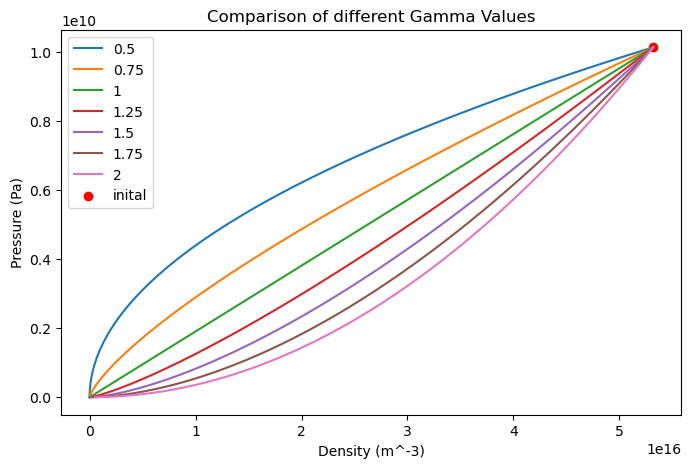

In [2]:
# Comparason of different Gamma values
# Constants
R = 8.314  # Universal gas constant J/(mol*K)

# Final pressure
P_final = 101325 * 10  # Final pressure in Pascals -> 1e1 from Glover

gamma_L = []
T_L = []
V_L = []

plt.figure(figsize=(8, 5))

for gamma in np.linspace(0.5, 2, 7):

    # Initial conditions
    P_initial = 101325 * 1e5  # Initial pressure in Pascals (1 atm adjusted) -> 1e5 from Glover
    V_initial = 1.88 * 1e-17  # Initial volume in cubic meters -> 10µm diamater and 1µm depth from Glover
    T_initial = 3560     # Initial temperature in Kelvin -> smalled used temp in Glover

    # Function to calculate volume from pressure using adiabatic relation
    def volume_from_pressure(P, P_initial, V_initial):
        return V_initial * (P_initial / P) ** (1 / gamma)

    # Calculate final conditions after adiabatic process
    P_final = 101325 * 10  # Final pressure in Pascals -> 1e1 from Glover
    V_final = volume_from_pressure(P_final, P_initial, V_initial)
    T_final = T_initial * (V_initial / V_final) ** (gamma - 1)
    
    gamma_L.append(gamma)
    T_L.append(T_final)
    V_L.append(V_final)
    

    # Plotting Pressure vs Volume
    P_values = np.linspace(P_initial, P_final, 1000)
    V_values = [volume_from_pressure(p, P_initial, V_initial) for p in P_values]

    V_values = 1/np.array(V_values)
    
    
    plt.plot(V_values, P_values, label=f'{gamma:.3g}')
    
plt.scatter(1/V_initial, P_initial, color='red', label="inital")

gamma_L = np.array(gamma_L)
T_L = np.array(T_L)
V_L = np.array(V_L)

plt.xlabel('Density (m^-3)')
plt.ylabel('Pressure (Pa)')
plt.title('Comparison of different Gamma Values')
plt.legend()

>Calcuated pressure vs density for material expanding into vacume. Expanding into 'vacume' accutally final pressures calaculated from Glovers calculations at the end of the expansion ($\approx10$ atm). Inital volumes are assumed from an ablation creator size of 10µm across and 1µm in depth.

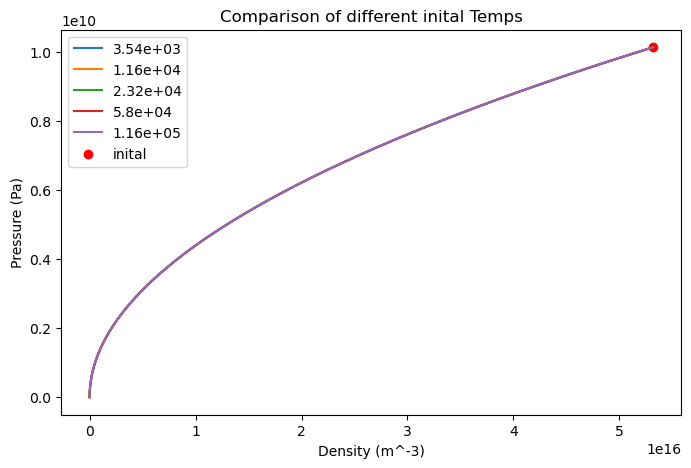

In [10]:
# Comparason of different inital temps
# Constants
R = 8.314  # Universal gas constant J/(mol*K)

# Final pressure
P_final = 101325 * 10  # Final pressure in Pascals -> 1e1 from Glover

gamma_L = []
T_L = []
V_L = []

temps = [3540, 11604, 23208, 58020, 116040] #-> from Glover

plt.figure(figsize=(8, 5))

for T_initial in temps:

    # Initial conditions
    P_initial = 101325 * 1e5  # Initial pressure in Pascals (1 atm adjusted) -> 1e5 from Glover
    V_initial = 1.88 * 1e-17  # Initial volume in cubic meters -> 10µm diamater and 1µm depth from Glover
    gamma = 0.5 # Just an arbitory value chosen, will need to change

    # Function to calculate volume from pressure using adiabatic relation
    def volume_from_pressure(P, P_initial, V_initial):
        return V_initial * (P_initial / P) ** (1 / gamma)

    # Calculate final conditions after adiabatic process
    P_final = 101325 * 10  # Final pressure in Pascals -> 1e1 from Glover
    V_final = volume_from_pressure(P_final, P_initial, V_initial)
    T_final = T_initial * (V_initial / V_final) ** (gamma - 1)
    
    gamma_L.append(gamma)
    T_L.append(T_final)
    V_L.append(V_final)
    

    # Plotting Pressure vs Volume
    P_values = np.linspace(P_initial, P_final, 1000)
    V_values = [volume_from_pressure(p, P_initial, V_initial) for p in P_values]
    V_values = 1/np.array(V_values)
    
    
    plt.plot(V_values, P_values, label=f'{T_initial:.3g}')
    
plt.scatter(1/V_initial, P_initial, color='red', label="inital")

gamma_L = np.array(gamma_L)
T_L = np.array(T_L)
V_L = np.array(V_L)

plt.xlabel('Density (m^-3)')
plt.ylabel('Pressure (Pa)')
plt.title('Comparison of different inital Temps')
plt.legend()

>Calcuated pressure as a function over change in density, when density is decreasing. different inital temps are used 

#### Attempting to make this work with expantion volume speed limts

assuming that the fluid expands at it's maximal speed, were $c = v$ meaning $v = (\frac{dP}{d\rho})^{0.5}$ can be used as the speed limit for the fluids expansion

In [325]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant J/(mol*K)

# Initial conditions
P_0 = 101325  # Initial pressure in Pascals (1 atm)
V_0 = 1.88 * 1e-17  # Initial volume in cubic meters
T_0 = 3560  # Initial temperature in Kelvin

c_0 = 1500  # Estimated speed of sound in water
gamma = 1.4  # Typical value for air, change if needed

steps = 10
time = np.logspace(-14, -10, steps)  # time frame of calculations

P_diff = np.zeros(steps)
Rho_diff = np.zeros(steps)

P = np.zeros(steps)
Rho = np.zeros(steps)

v = c_0

for t in range(steps):
    P[t] = P_0 * (1 - 0.5 * (gamma - 1) * np.abs(v) / c_0) * np.exp((2 * gamma) / (gamma - 1))
    Rho[t] = (1 / V_0) * (1 - 0.5 * (gamma - 1) * np.abs(v) / c_0) * np.exp(2 / (gamma - 1))


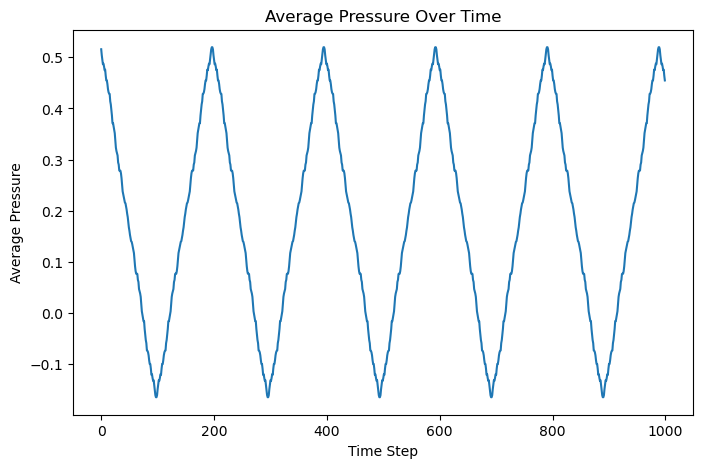

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Set Parameters
dt = 0.01  # Time Step
dx = 0.01  # Space Step
nx = 100   # Number of spatial points

# Initialize Variables
u = np.zeros(nx)  # Velocity Array
p = np.random.random(nx)  # Random Pressure Array

# List to store average pressure values
avg_pressure = []

# Finite Difference Implementation of Euler's Equation
for t in range(1000):
    u_new = np.copy(u)
    u_new[1:-1] = u[1:-1] - dt/dx * (p[2:] - p[:-2])
    u = u_new
    p[1:-1] = p[1:-1] - dt/dx * (u[2:] - u[:-2])

    avg_pressure.append(np.mean(p))

# Plot the Results
plt.figure(figsize=(8, 5))
plt.plot(avg_pressure)
plt.xlabel('Time Step')
plt.ylabel('Average Pressure')
plt.title('Average Pressure Over Time')
plt.show()


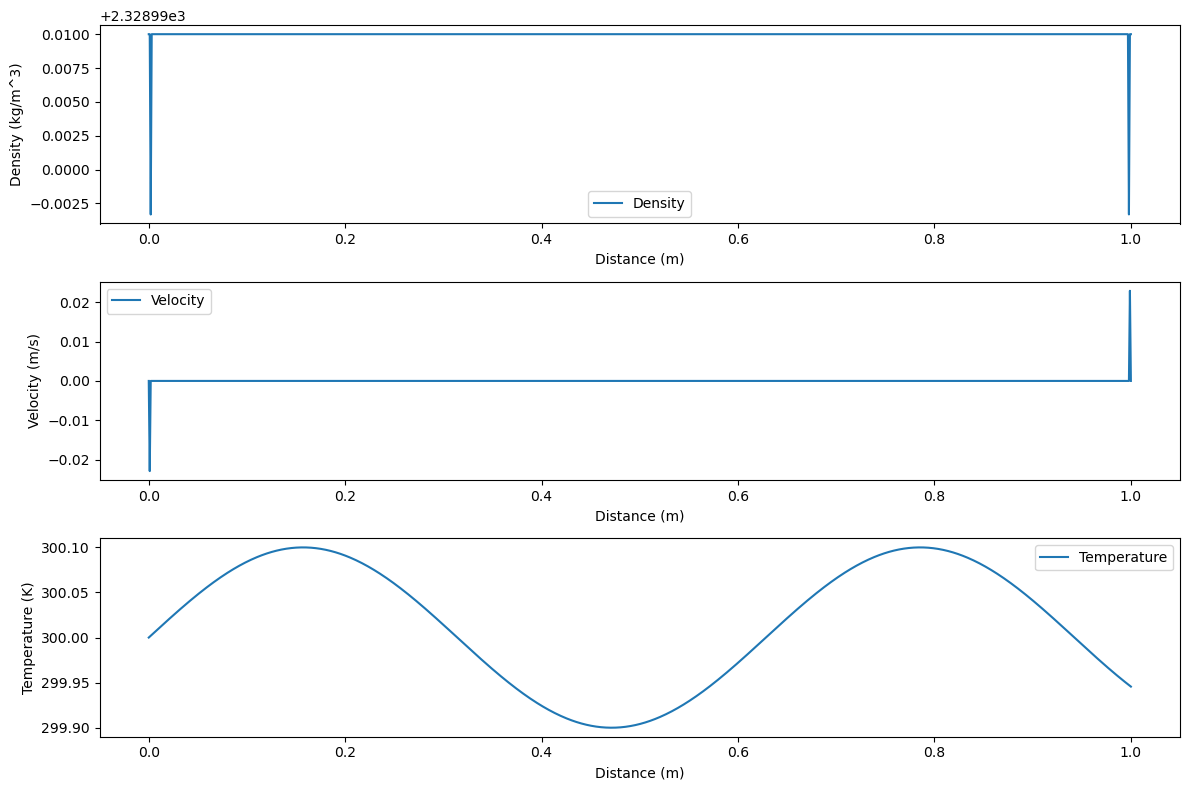

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants and initial conditions
rho0 = 2329  # Initial density of silicon in kg/m^3
u0 = 0  # Initial velocity in m/s
T0 = 300  # Initial temperature in K
P0 = 1e5  # Initial pressure in Pa (small positive value)
L = 1.0  # Length of the domain in meters
Nx = 1000  # Number of spatial points
dx = L / (Nx - 1)  # Spatial step size
dt = 1e-10  # Time step size (further reduced)
total_time = 1e-6  # Total simulation time

# Initialize the fields
x = np.linspace(0, L, Nx)
rho = np.ones(Nx) * rho0
u = np.ones(Nx) * u0
P = np.ones(Nx) * P0
T = np.ones(Nx) * T0 + 0.1 * np.sin(x * 10)  # Smoothed initial temperature

# Equation of State for silicon (simplified)
def pressure(rho, T):
    R = 8.314  # Gas constant
    M = 28.085  # Molar mass of silicon
    return rho * R * T / M

# Update function for hydrodynamic variables
def update(rho, u, P, T, dx, dt):
    # Central difference for interior points
    drho_dt = -rho[1:-1] * (u[2:] - u[:-2]) / (2 * dx) - u[1:-1] * (rho[2:] - rho[:-2]) / (2 * dx)
    du_dt = -u[1:-1] * (u[2:] - u[:-2]) / (2 * dx) - (P[2:] - P[:-2]) / (rho[1:-1] * 2 * dx)
    dT_dt = -u[1:-1] * (T[2:] - T[:-2]) / (2 * dx)
    
    # Update fields
    rho[1:-1] += drho_dt * dt
    u[1:-1] += du_dt * dt
    T[1:-1] += dT_dt * dt
    P[1:-1] = pressure(rho[1:-1], T[1:-1])
    
    # Ensure physical values
    rho = np.maximum(rho, 1e-10)
    T = np.maximum(T, 1e-10)
    
    return rho, u, P, T

# Main simulation loop
num_steps = int(total_time / dt)
for t in range(num_steps):
    rho, u, P, T = update(rho, u, P, T, dx, dt)

# Plotting results
plt.figure(figsize=(12, 8))

plt.subplot(311)
plt.plot(x, rho, label='Density')
plt.xlabel('Distance (m)')
plt.ylabel('Density (kg/m^3)')
plt.legend()

plt.subplot(312)
plt.plot(x, u, label='Velocity')
plt.xlabel('Distance (m)')
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.subplot(313)
plt.plot(x, T, label='Temperature')
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (K)')
plt.legend()

plt.tight_layout()
plt.show()